**ISMAIL ABU SAIID**

**BIG DATA ANALYTICS**

# **Analysis of Talent Migration and its impact on the Industry Growth in Malaysia**

**DATA SCIENCE QUESTIONS:**

1. What are the proportions of migration for different regions into and out of Malaysia?

2. Which countries contribute the most to net migration into Malaysia, and what is the income level of these countries?

3. Which countries have the highest net migration out of Malaysia, and what is the income level of these countries?

4. How does the net migration rate into and out of Malaysia vary from 2015 to 2019?

5. How have the growth rates evolved across various industry sectors in Malaysia from 2015 to 2019?

6. Is there a correlation between the net country migration rate in Malaysia and the growth rates of industry sectors from 2015 to 2019?

7. What is the trend in the net migration rate of industry sectors in Malaysia from 2015 to 2019?

8. Which industry sections exhibit the highest migration rates through out 2015 to 2019?

9. Which industry sections exhibit the lowest migration rates through out 2015 to 2019?

10. How do the migration rates of industries sections compare with their respective growth rates from 2015 to 2019?

In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**1. What are the proportions of migration for different regions into and out of Malaysia?**

In [2]:
# Loading data
country_migration = pd.read_excel('dataset/dataset/public_use-talent-migration.xlsx', sheet_name = 'Country Migration')

# Checking the info and number of unique values
country_migration.info()
country_migration.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4148 entries, 0 to 4147
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   base_country_code         4148 non-null   object 
 1   base_country_name         4148 non-null   object 
 2   base_lat                  4148 non-null   float64
 3   base_long                 4148 non-null   float64
 4   base_country_wb_income    4148 non-null   object 
 5   base_country_wb_region    4148 non-null   object 
 6   target_country_code       4148 non-null   object 
 7   target_country_name       4148 non-null   object 
 8   target_lat                4148 non-null   float64
 9   target_long               4148 non-null   float64
 10  target_country_wb_income  4148 non-null   object 
 11  target_country_wb_region  4148 non-null   object 
 12  net_per_10K_2015          4148 non-null   float64
 13  net_per_10K_2016          4148 non-null   float64
 14  net_per_

base_country_code           140
base_country_name           140
base_lat                    140
base_long                   140
base_country_wb_income        4
base_country_wb_region        7
target_country_code         140
target_country_name         140
target_lat                  140
target_long                 140
target_country_wb_income      4
target_country_wb_region      7
net_per_10K_2015            815
net_per_10K_2016            782
net_per_10K_2017            717
net_per_10K_2018            750
net_per_10K_2019            751
dtype: int64

In [3]:
country_migration.head()

,base_country_code,base_country_name,base_lat,base_long,base_country_wb_income,base_country_wb_region,target_country_code,target_country_name,target_lat,target_long,target_country_wb_income,target_country_wb_region,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
0,ae,United Arab Emirates,23.424076,53.847818,High Income,Middle East & North Africa,af,Afghanistan,33.939110,67.709953,Low Income,South Asia,0.19,0.16,0.11,-0.05,-0.02
1,ae,United Arab Emirates,23.424076,53.847818,High Income,Middle East & North Africa,dz,Algeria,28.033886,1.659626,Upper Middle Income,Middle East & North Africa,0.19,0.25,0.57,0.55,0.78
2,ae,United Arab Emirates,23.424076,53.847818,High Income,Middle East & North Africa,ao,Angola,-11.202692,17.873887,Lower Middle Income,Sub-Saharan Africa,-0.01,0.04,0.11,-0.02,-0.06
3,ae,United Arab Emirates,23.424076,53.847818,High Income,Middle East & North Africa,ar,Argentina,-38.416097,-63.616672,High Income,Latin America & Caribbean,0.16,0.18,0.04,0.01,0.23
4,ae,United Arab Emirates,23.424076,53.847818,High Income,Middle East & North Africa,am,Armenia,40.069099,45.038189,Upper Middle Income,Europe & Central Asia,0.10,0.05,0.03,-0.01,0.02


In [4]:
# Keeping data that is for Malaysia only
malaysia_migration = country_migration.copy()
malaysia_migration = malaysia_migration[(malaysia_migration['base_country_name'] == 'Malaysia')]
malaysia_migration.head()

,base_country_code,base_country_name,base_lat,base_long,base_country_wb_income,base_country_wb_region,target_country_code,target_country_name,target_lat,target_long,target_country_wb_income,target_country_wb_region,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
2674,my,Malaysia,4.210484,101.975766,Upper Middle Income,East Asia & Pacific,dz,Algeria,28.033886,1.659626,Upper Middle Income,Middle East & North Africa,0.06,0.01,-0.02,0.01,0.01
2675,my,Malaysia,4.210484,101.975766,Upper Middle Income,East Asia & Pacific,au,Australia,-25.274398,133.775136,High Income,East Asia & Pacific,-0.61,-2.61,-2.26,-1.39,-0.81
2676,my,Malaysia,4.210484,101.975766,Upper Middle Income,East Asia & Pacific,bh,Bahrain,25.930414,50.637772,High Income,Middle East & North Africa,0.00,-0.06,-0.04,-0.02,-0.04
2677,my,Malaysia,4.210484,101.975766,Upper Middle Income,East Asia & Pacific,bd,Bangladesh,23.684994,90.356331,Lower Middle Income,South Asia,0.26,0.19,-0.01,-0.09,-0.26
2678,my,Malaysia,4.210484,101.975766,Upper Middle Income,East Asia & Pacific,be,Belgium,50.503887,4.469936,High Income,Europe & Central Asia,-0.02,0.02,0.00,-0.03,-0.05


In [5]:
# Dropping unnecessary columns
malaysia_migration_region = malaysia_migration.drop(columns = ['base_country_name', 'base_country_code', 'base_lat', 'base_long', 'base_country_wb_income', 'base_country_wb_region', 'target_country_name', 'target_country_code', 'target_lat',
                                 'target_long', 'target_country_wb_income'])

# Renaming columns
malaysia_migration_region = malaysia_migration_region.rename(columns={'net_per_10K_2015': '2015', 'net_per_10K_2016': '2016', 'net_per_10K_2017': '2017', 'net_per_10K_2018': '2018',
                                                   'net_per_10K_2019': '2019'})

# Renaming target country regions
malaysia_migration_region['target_country_wb_region'].replace(['Middle East & North Africa'], 'Middle East', inplace=True)
malaysia_migration_region['target_country_wb_region'].replace(['East Asia & Pacific'], 'East Asia', inplace=True)
malaysia_migration_region['target_country_wb_region'].replace(['Europe & Central Asia'], 'Europe', inplace=True)
malaysia_migration_region['target_country_wb_region'].replace(['Latin America & Caribbean'], 'Latin America', inplace=True)

# Resetting index and viewing the info & first 5 rows
malaysia_migration_region = malaysia_migration_region.reset_index(drop=True)
malaysia_migration_region.info()
malaysia_migration_region.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   target_country_wb_region  52 non-null     object 
 1   2015                      52 non-null     float64
 2   2016                      52 non-null     float64
 3   2017                      52 non-null     float64
 4   2018                      52 non-null     float64
 5   2019                      52 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.6+ KB


,target_country_wb_region,2015,2016,2017,2018,2019
0,Middle East,0.06,0.01,-0.02,0.01,0.01
1,East Asia,-0.61,-2.61,-2.26,-1.39,-0.81
2,Middle East,0.00,-0.06,-0.04,-0.02,-0.04
3,South Asia,0.26,0.19,-0.01,-0.09,-0.26
4,Europe,-0.02,0.02,0.00,-0.03,-0.05


In [6]:
# Grouping by 'target_country_wb_region' and summing values across the years
region_proportions = malaysia_migration_region.groupby('target_country_wb_region').sum()
region_proportions

,2015,2016,2017,2018,2019
target_country_wb_region,,,,,
East Asia,-9.00,-13.24,-11.20,-10.06,-9.71
Europe,-0.01,-0.79,-0.65,0.37,-0.47
Latin America,-0.04,0.02,0.05,0.03,0.05
Middle East,-3.10,-2.58,-1.33,-1.01,-1.23
North America,5.79,1.20,-0.02,0.43,-0.06
South Asia,4.67,3.22,2.86,3.82,2.80
Sub-Saharan Africa,-0.69,-0.54,-0.41,-0.42,-0.33


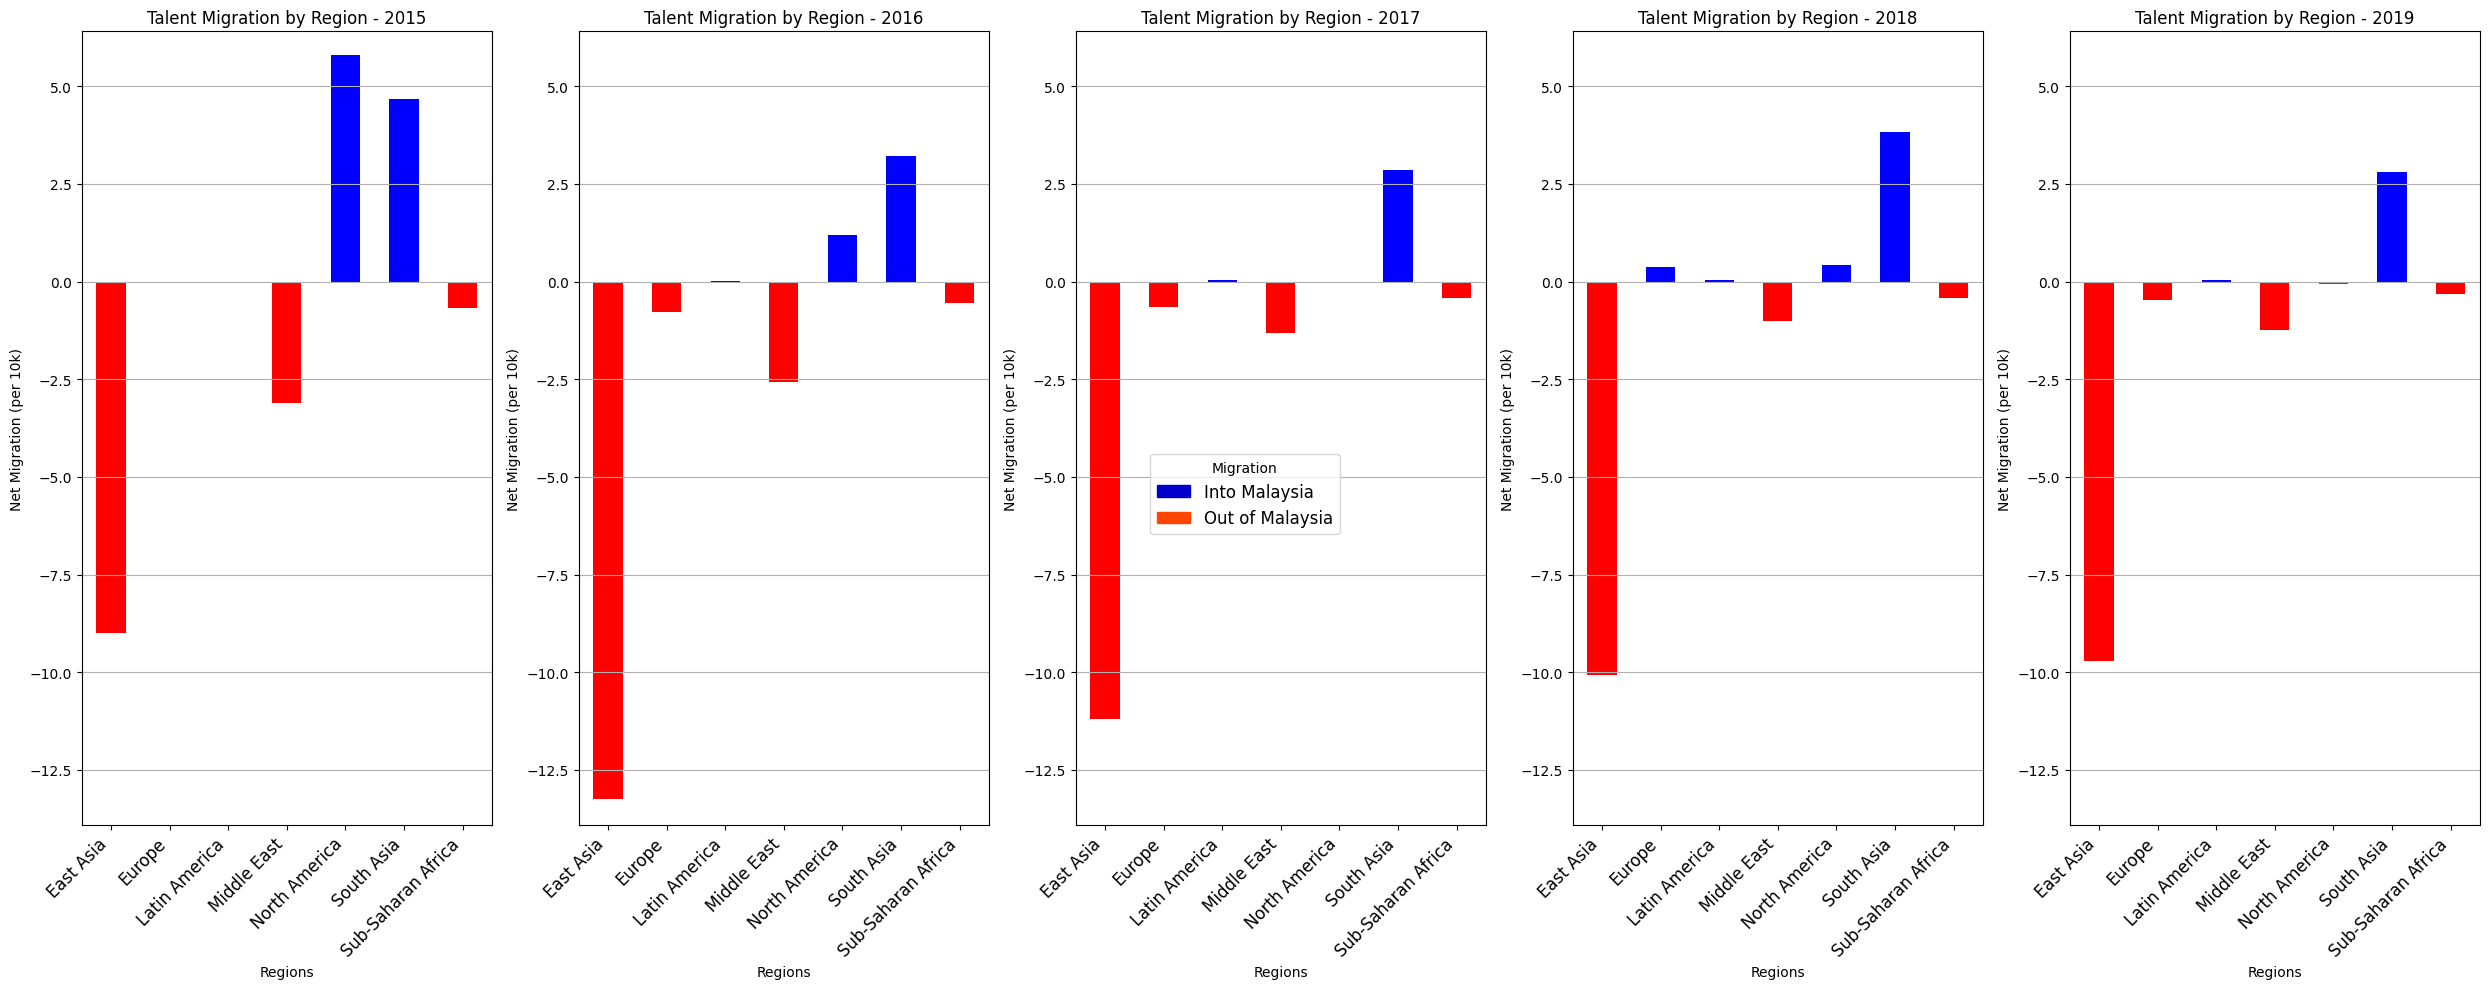

In [8]:
# Transpose the DataFrame for plotting
region_proportions = region_proportions.T  # Transpose the DataFrame

# Determine y-axis limits based on the overall data range
min_value = region_proportions.min().min()
max_value = region_proportions.max().max()
y_axis_range = max(abs(min_value), abs(max_value)) * 1.05   # Set a buffer for better visualization

# Plotting migration proportions for each year
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25, 10)) 

for i, year in enumerate(region_proportions.columns):
    ax = axes[i]
    colors = ['red' if val < 0 else 'blue' for val in region_proportions[year]]  # Red for negative, blue for positive
    region_proportions[year].plot(kind='bar', ax=ax, color=colors)
    ax.set_title(f'Talent Migration by Region - {year}')
    ax.set_xlabel('Regions')
    ax.set_ylabel('Net Migration (per 10k)')
    ax.set_xticklabels(region_proportions.index, rotation=45, ha='right')
    ax.grid(axis='y')
    ax.set_ylim(-y_axis_range, y_axis_range - 7.5)
    ax.xaxis.set_tick_params(labelsize=12)

# Creating custom legend
legend_labels = ['Into Malaysia', 'Out of Malaysia']
legend_colors = ['mediumblue', 'orangered']
handles = [plt.Rectangle((0,0),1,1, color=color) for color in legend_colors]
plt.figlegend(handles, legend_labels, loc='center', title='Migration', fontsize = 12)

plt.tight_layout()
#plt.savefig('1.png')
plt.show()

**Regional Migration Proportions and Patterns**

Regional Imbalance: A consistent trend of East Asia contributing the most outbound migration and South Asia being the primary contributor to inbound migration might indicate specific economic, cultural, or professional ties between these regions and Malaysia.

Shifting Trends: The decrease in North America's contribution to inbound migration suggests changing dynamics or preferences in talent movement from that region to Malaysia.

Overall Negative Net Migration: The consistent negative net migration (more migration out of Malaysia than into it) across all years suggests a recurring trend.

**2. Which countries contribute the most to net migration into Malaysia, and what is the income level of these countries?**

In [9]:
malaysia_migration.head()

,base_country_code,base_country_name,base_lat,base_long,base_country_wb_income,base_country_wb_region,target_country_code,target_country_name,target_lat,target_long,target_country_wb_income,target_country_wb_region,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
2674,my,Malaysia,4.210484,101.975766,Upper Middle Income,East Asia & Pacific,dz,Algeria,28.033886,1.659626,Upper Middle Income,Middle East & North Africa,0.06,0.01,-0.02,0.01,0.01
2675,my,Malaysia,4.210484,101.975766,Upper Middle Income,East Asia & Pacific,au,Australia,-25.274398,133.775136,High Income,East Asia & Pacific,-0.61,-2.61,-2.26,-1.39,-0.81
2676,my,Malaysia,4.210484,101.975766,Upper Middle Income,East Asia & Pacific,bh,Bahrain,25.930414,50.637772,High Income,Middle East & North Africa,0.00,-0.06,-0.04,-0.02,-0.04
2677,my,Malaysia,4.210484,101.975766,Upper Middle Income,East Asia & Pacific,bd,Bangladesh,23.684994,90.356331,Lower Middle Income,South Asia,0.26,0.19,-0.01,-0.09,-0.26
2678,my,Malaysia,4.210484,101.975766,Upper Middle Income,East Asia & Pacific,be,Belgium,50.503887,4.469936,High Income,Europe & Central Asia,-0.02,0.02,0.00,-0.03,-0.05


In [10]:
# Dropping unnecessary columns
malaysia_migration_income = malaysia_migration.drop(columns = ['base_country_code','base_country_name', 'base_lat', 'base_long', 'base_country_wb_income', 'base_country_wb_region', 'target_country_code', 'target_lat',
                                 'target_long', 'target_country_wb_region'])

# Renaming columns
malaysia_migration_income = malaysia_migration_income.rename(columns={'net_per_10K_2015': '2015', 'net_per_10K_2016': '2016', 'net_per_10K_2017': '2017', 'net_per_10K_2018': '2018',
                                                   'net_per_10K_2019': '2019'})

# Resetting index and viewing the info & first 5 rows
malaysia_migration_income = malaysia_migration_income.reset_index(drop=True)
malaysia_migration_income.info()
malaysia_migration_income.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   target_country_name       52 non-null     object 
 1   target_country_wb_income  52 non-null     object 
 2   2015                      52 non-null     float64
 3   2016                      52 non-null     float64
 4   2017                      52 non-null     float64
 5   2018                      52 non-null     float64
 6   2019                      52 non-null     float64
dtypes: float64(5), object(2)
memory usage: 3.0+ KB


,target_country_name,target_country_wb_income,2015,2016,2017,2018,2019
0,Algeria,Upper Middle Income,0.06,0.01,-0.02,0.01,0.01
1,Australia,High Income,-0.61,-2.61,-2.26,-1.39,-0.81
2,Bahrain,High Income,0.00,-0.06,-0.04,-0.02,-0.04
3,Bangladesh,Lower Middle Income,0.26,0.19,-0.01,-0.09,-0.26
4,Belgium,High Income,-0.02,0.02,0.00,-0.03,-0.05


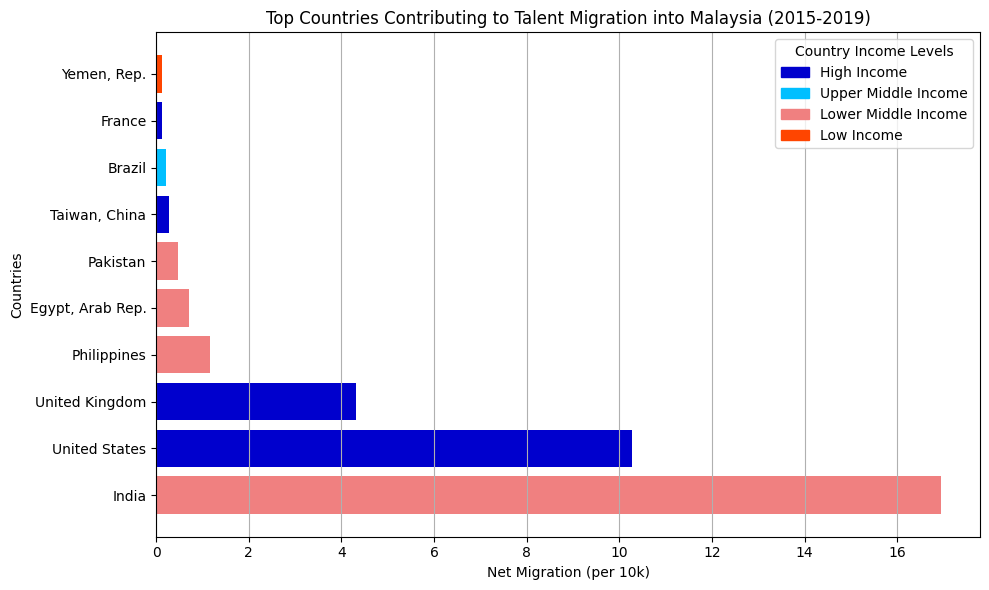

In [11]:
# Calculating net migration for each country across years
malaysia_migration_income['Net_Migration'] = malaysia_migration_income[['2015', '2016', '2017', '2018', '2019']].sum(axis=1)

# Mapping income levels to colors
income_colors = {
    'High Income': 'mediumblue',
    'Upper Middle Income': 'deepskyblue',
    'Lower Middle Income': 'lightcoral',
    'Low Income': 'orangered'
}

# Sorting by net migration to identify top contributing countries
top_countries_in = malaysia_migration_income.sort_values(by='Net_Migration', ascending=False).head(10)

# Plotting bar chart for net migration with color-coded income levels
plt.figure(figsize=(10, 6))

bars = plt.barh(top_countries_in['target_country_name'], top_countries_in['Net_Migration'], color=[income_colors[income] for income in top_countries_in['target_country_wb_income']])
plt.xlabel('Net Migration (per 10k)')
plt.ylabel('Countries')
plt.title('Top Countries Contributing to Talent Migration into Malaysia (2015-2019)')

# Creating legend for income levels
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for income, color in income_colors.items()]
legend_labels = list(income_colors.keys())
plt.legend(legend_handles, legend_labels, title='Country Income Levels', loc='upper right')

plt.grid(axis='x')
plt.tight_layout()
#plt.savefig('2.png')
plt.show()

In [12]:
malaysia_migration_income.head()

,target_country_name,target_country_wb_income,2015,2016,2017,2018,2019,Net_Migration
0,Algeria,Upper Middle Income,0.06,0.01,-0.02,0.01,0.01,0.07
1,Australia,High Income,-0.61,-2.61,-2.26,-1.39,-0.81,-7.68
2,Bahrain,High Income,0.00,-0.06,-0.04,-0.02,-0.04,-0.16
3,Bangladesh,Lower Middle Income,0.26,0.19,-0.01,-0.09,-0.26,0.09
4,Belgium,High Income,-0.02,0.02,0.00,-0.03,-0.05,-0.08


**3. Which countries have the highest net migration out of Malaysia, and what is the income level of these countries?**

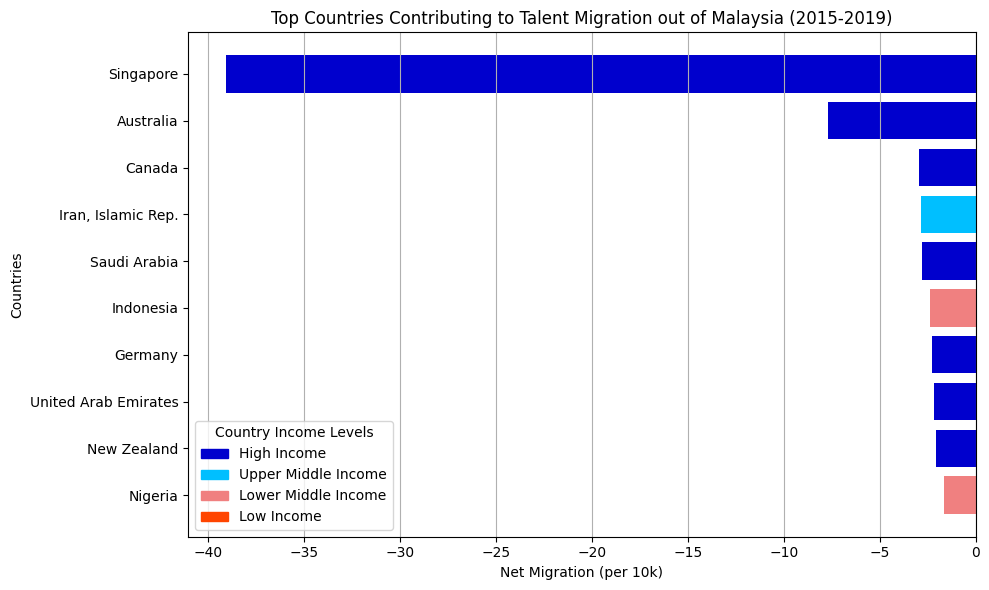

In [13]:
# Calculating net migration for each country across years
malaysia_migration_income['Net_Migration'] = malaysia_migration_income[['2015', '2016', '2017', '2018', '2019']].sum(axis=1)


# Sorting by net migration to identify top contributing countries
top_countries_out = malaysia_migration_income.sort_values(by='Net_Migration', ascending=False).tail(10)

# Plotting bar chart for net migration with color-coded income levels
plt.figure(figsize=(10, 6))

bars = plt.barh(top_countries_out['target_country_name'], top_countries_out['Net_Migration'], color=[income_colors[income] for income in top_countries_out['target_country_wb_income']])
plt.xlabel('Net Migration (per 10k)')
plt.ylabel('Countries')
plt.title('Top Countries Contributing to Talent Migration out of Malaysia (2015-2019)')

# Creating legend for income levels
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for income, color in income_colors.items()]
legend_labels = list(income_colors.keys())
plt.legend(legend_handles, legend_labels, title='Country Income Levels', loc='lower left')

plt.grid(axis='x')
plt.tight_layout()
#plt.savefig('3.png')
plt.show()

**Country Contributions to migration & their Income Level**


**Patterns in Migration Flow**

Distinct Attractiveness: While India, the United States, and the United Kingdom contribute significantly to inbound migration, Singapore stands out for its substantial outbound migration from Malaysia.

Regional Influence: Geographical proximity and regional ties could contribute to the prominence of Singapore in outbound migration and India's dominance in inbound migration.

Inbound Migration Into Malaysia: The top countries like India, the Philippines, Egypt, Pakistan, etc., are predominantly Lower Middle Income countries. Individuals migrating from these nations may seek better economic prospects, job opportunities, or improved quality of life in Malaysia, which, as an Upper Middle Income country, might offer relative advancements or opportunities.

Outbound Migration From Malaysia: The top countries like Singapore, Australia, Canada, Germany, etc., are mostly High Income countries. Individuals migrating from Malaysia to these nations, characterized by higher income levels, might be seeking better economic prospects, higher living standards, advanced healthcare, or educational opportunities.


**4. How does the net migration rate into and out of Malaysia vary from 2015 to 2019?**

In [14]:
malaysia_migration.head()

,base_country_code,base_country_name,base_lat,base_long,base_country_wb_income,base_country_wb_region,target_country_code,target_country_name,target_lat,target_long,target_country_wb_income,target_country_wb_region,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
2674,my,Malaysia,4.210484,101.975766,Upper Middle Income,East Asia & Pacific,dz,Algeria,28.033886,1.659626,Upper Middle Income,Middle East & North Africa,0.06,0.01,-0.02,0.01,0.01
2675,my,Malaysia,4.210484,101.975766,Upper Middle Income,East Asia & Pacific,au,Australia,-25.274398,133.775136,High Income,East Asia & Pacific,-0.61,-2.61,-2.26,-1.39,-0.81
2676,my,Malaysia,4.210484,101.975766,Upper Middle Income,East Asia & Pacific,bh,Bahrain,25.930414,50.637772,High Income,Middle East & North Africa,0.00,-0.06,-0.04,-0.02,-0.04
2677,my,Malaysia,4.210484,101.975766,Upper Middle Income,East Asia & Pacific,bd,Bangladesh,23.684994,90.356331,Lower Middle Income,South Asia,0.26,0.19,-0.01,-0.09,-0.26
2678,my,Malaysia,4.210484,101.975766,Upper Middle Income,East Asia & Pacific,be,Belgium,50.503887,4.469936,High Income,Europe & Central Asia,-0.02,0.02,0.00,-0.03,-0.05


In [15]:
# Dropping unnecessary columns
net_migration = malaysia_migration.drop(columns = ['base_country_code', 'base_lat', 'base_long', 'base_country_wb_income', 'base_country_wb_region', 'target_country_code', 'target_lat',
                                 'target_long', 'target_country_wb_income', 'target_country_wb_region'])

# Renaming columns
net_migration = net_migration.rename(columns={'net_per_10K_2015': '2015', 'net_per_10K_2016': '2016', 'net_per_10K_2017': '2017', 'net_per_10K_2018': '2018',
                                                   'net_per_10K_2019': '2019'})

# Resetting index and viewing the info & first 5 rows
net_migration = net_migration.reset_index(drop=True)
net_migration.info()
net_migration.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   base_country_name    52 non-null     object 
 1   target_country_name  52 non-null     object 
 2   2015                 52 non-null     float64
 3   2016                 52 non-null     float64
 4   2017                 52 non-null     float64
 5   2018                 52 non-null     float64
 6   2019                 52 non-null     float64
dtypes: float64(5), object(2)
memory usage: 3.0+ KB


,base_country_name,target_country_name,2015,2016,2017,2018,2019
0,Malaysia,Algeria,0.06,0.01,-0.02,0.01,0.01
1,Malaysia,Australia,-0.61,-2.61,-2.26,-1.39,-0.81
2,Malaysia,Bahrain,0.00,-0.06,-0.04,-0.02,-0.04
3,Malaysia,Bangladesh,0.26,0.19,-0.01,-0.09,-0.26
4,Malaysia,Belgium,-0.02,0.02,0.00,-0.03,-0.05


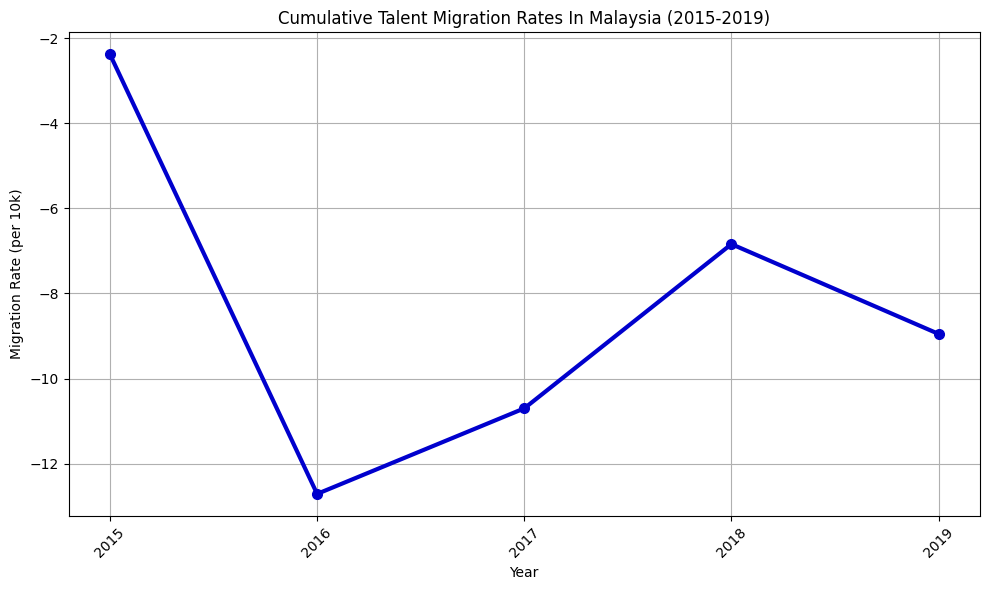

In [16]:
# Extracting the columns with migration rates, and summing them up for (2015 to 2019)
migration_rates = net_migration.iloc[:, 2:].sum()

# Plotting the cumulative changes in migration rates over the years
plt.figure(figsize=(10, 6))
plt.plot(migration_rates.index, migration_rates, marker='o', markersize=7, color='mediumblue', linewidth =3)

plt.xlabel('Year')
plt.ylabel('Migration Rate (per 10k)')
plt.title('Cumulative Talent Migration Rates In Malaysia (2015-2019)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
#plt.savefig('4.png')
plt.show()

**Temporal Analysis of Net Migration**

Consistently Negative Net Migration: The consistent negative net migration rate (more migration out of Malaysia than into it) from 2015 to 2019 suggests a continuous trend of outbound migration being higher than inbound migration.

2015 to 2016 Drop: The sharp increase in negative net migration from -2.38 in 2015 to -12.71 in 2016 indicates a significant shift, potentially influenced by changes in migration patterns or events during that period.

Potential Explanation for Drop: The substantial drop in net migration rates might be attributed to the decrease in migration from North America, which was notably high in 2015 but declined sharply in subsequent years. And by the significant increase in outbound migration to East Asia compared to the previous year.
(As seen in the visualization earlier of Regional Migration Proportions and Patterns)

In [17]:
migration_rates.info()

<class 'pandas.core.series.Series'>
Index: 5 entries, 2015 to 2019
Series name: None
Non-Null Count  Dtype  
--------------  -----  
5 non-null      float64
dtypes: float64(1)
memory usage: 80.0+ bytes


In [18]:
migration_rates

2015    -2.38
2016   -12.71
2017   -10.70
2018    -6.84
2019    -8.95
dtype: float64

**5. How have the growth rates evolved across various industry sectors in Malaysia from 2015 to 2019?**

In [19]:
# Loading data into a DataFrame
industry_growth = pd.read_excel('dataset/dataset/public_use-industry-employment-growth.xlsx', sheet_name = 'Growth from Industry Transition')

# Checking the info and number of unique values
industry_growth.info()
industry_growth.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7335 entries, 0 to 7334
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country_code        7335 non-null   object 
 1   country_name        7335 non-null   object 
 2   wb_region           7335 non-null   object 
 3   wb_income           7335 non-null   object 
 4   isic_section_index  7335 non-null   object 
 5   isic_section_name   7335 non-null   object 
 6   industry_id         7335 non-null   int64  
 7   industry_name       7335 non-null   object 
 8   growth_rate_2015    7335 non-null   float64
 9   growth_rate_2016    7335 non-null   float64
 10  growth_rate_2017    7335 non-null   float64
 11  growth_rate_2018    7335 non-null   float64
 12  growth_rate_2019    7335 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage: 745.1+ KB


country_code           128
country_name           128
wb_region                7
wb_income                4
isic_section_index       6
isic_section_name        6
industry_id             77
industry_name           77
growth_rate_2015      5778
growth_rate_2016      5749
growth_rate_2017      5600
growth_rate_2018      5492
growth_rate_2019      5340
dtype: int64

In [20]:
# Viewing first 5 rows
industry_growth.head()

,country_code,country_name,wb_region,wb_income,isic_section_index,isic_section_name,industry_id,industry_name,growth_rate_2015,growth_rate_2016,growth_rate_2017,growth_rate_2018,growth_rate_2019
0,ae,United Arab Emirates,Middle East & North Africa,High income,B,Mining and quarrying,56,Mining & Metals,0.078000,0.058550,0.043402,0.010048,-0.000621
1,ae,United Arab Emirates,Middle East & North Africa,High income,B,Mining and quarrying,57,Oil & Energy,0.033015,0.013479,0.017459,0.018514,0.022606
2,ae,United Arab Emirates,Middle East & North Africa,High income,C,Manufacturing,15,Pharmaceuticals,0.171367,0.136986,0.090631,0.048148,0.028423
3,ae,United Arab Emirates,Middle East & North Africa,High income,C,Manufacturing,23,Food Production,0.063351,0.038647,0.022137,0.005990,0.004317
4,ae,United Arab Emirates,Middle East & North Africa,High income,C,Manufacturing,52,Aviation & Aerospace,0.096607,0.056744,0.028673,0.015048,0.000816


In [21]:
# Keeping data that is for Malaysia only
malaysia_industry_growth = industry_growth.copy()
malaysia_industry_growth = malaysia_industry_growth[malaysia_industry_growth['country_name'] == 'Malaysia']

In [22]:
malaysia_industry_growth.head()

,country_code,country_name,wb_region,wb_income,isic_section_index,isic_section_name,industry_id,industry_name,growth_rate_2015,growth_rate_2016,growth_rate_2017,growth_rate_2018,growth_rate_2019
4577,my,Malaysia,East Asia & Pacific,Upper middle income,B,Mining and quarrying,56,Mining & Metals,0.006980,0.037999,0.030339,0.002800,0.001083
4578,my,Malaysia,East Asia & Pacific,Upper middle income,B,Mining and quarrying,57,Oil & Energy,-0.043263,-0.052420,-0.020668,-0.003818,0.002697
4579,my,Malaysia,East Asia & Pacific,Upper middle income,C,Manufacturing,15,Pharmaceuticals,0.001000,0.010220,0.015038,0.020388,0.000000
4580,my,Malaysia,East Asia & Pacific,Upper middle income,C,Manufacturing,23,Food Production,-0.028261,-0.007996,-0.000880,0.008610,0.003311
4581,my,Malaysia,East Asia & Pacific,Upper middle income,C,Manufacturing,52,Aviation & Aerospace,0.008982,-0.028070,-0.040603,-0.019220,0.002838


In [23]:
# Now dropping unnecessary columns
sectors_growth = malaysia_industry_growth.drop(columns = ['country_name', 'country_code', 'wb_region', 'wb_income', 'industry_name', 'isic_section_index', 'industry_id'])

# Renaming columns
sectors_growth = sectors_growth.rename(columns={'growth_rate_2015': '2015', 'growth_rate_2016': '2016', 'growth_rate_2017': '2017', 'growth_rate_2018': '2018',
                                                   'growth_rate_2019': '2019'})

# Resetting index and viewing the info & first 5 rows
sectors_growth = sectors_growth.reset_index(drop=True)
sectors_growth.info()
sectors_growth.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   isic_section_name  75 non-null     object 
 1   2015               75 non-null     float64
 2   2016               75 non-null     float64
 3   2017               75 non-null     float64
 4   2018               75 non-null     float64
 5   2019               75 non-null     float64
dtypes: float64(5), object(1)
memory usage: 3.6+ KB


,isic_section_name,2015,2016,2017,2018,2019
0,Mining and quarrying,0.006980,0.037999,0.030339,0.002800,0.001083
1,Mining and quarrying,-0.043263,-0.052420,-0.020668,-0.003818,0.002697
2,Manufacturing,0.001000,0.010220,0.015038,0.020388,0.000000
3,Manufacturing,-0.028261,-0.007996,-0.000880,0.008610,0.003311
4,Manufacturing,0.008982,-0.028070,-0.040603,-0.019220,0.002838


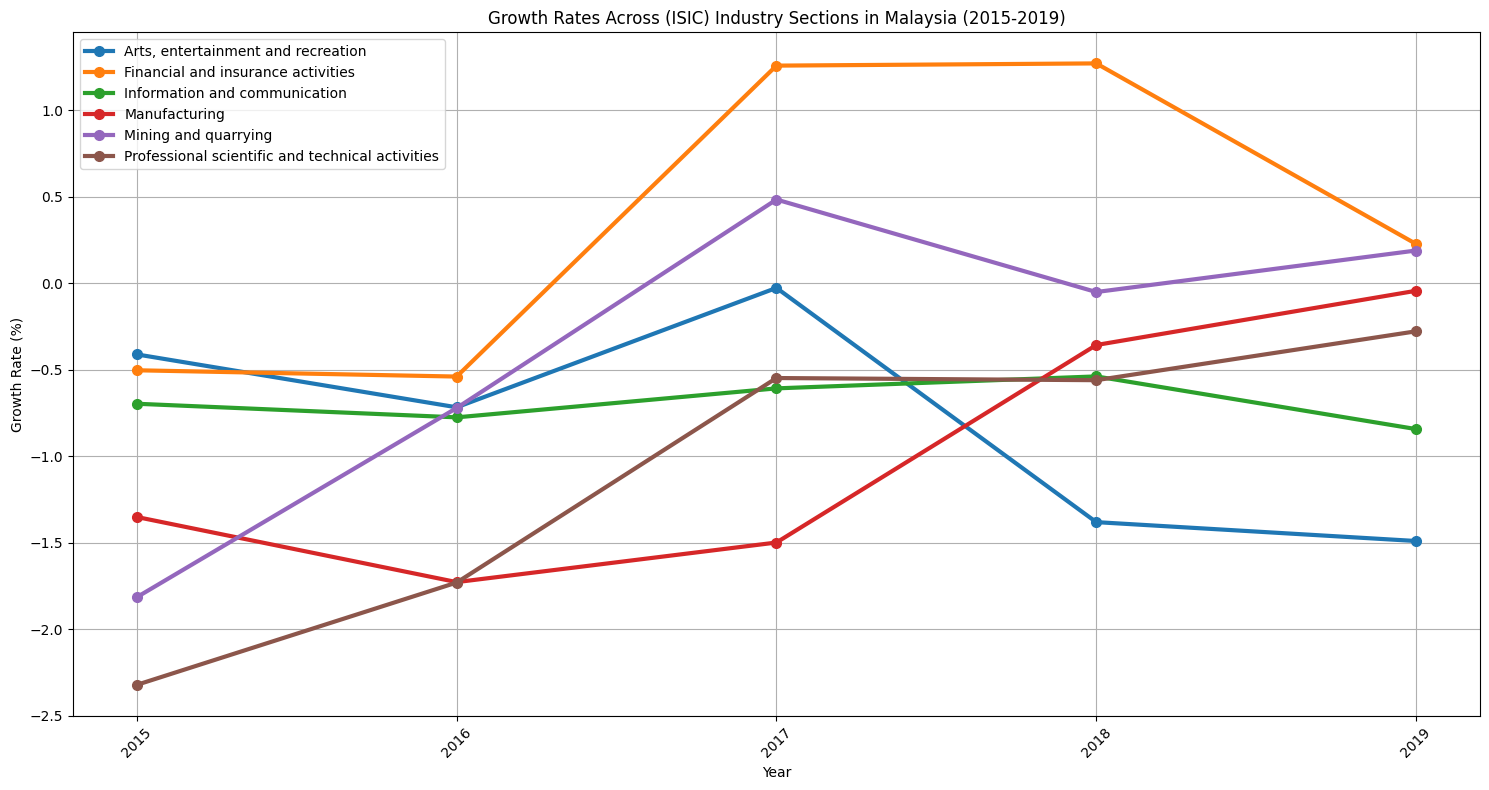

In [24]:
# Grouping by industry section and calculating mean growth rates across years
grouped_sectors_growth = sectors_growth.groupby('isic_section_name').mean().reset_index()

# Selecting growth rate columns
growth_rate_columns = ['2015', '2016', '2017', '2018', '2019']

# Plotting growth rates for each Industry Section
plt.figure(figsize=(15, 8))

for index, row in grouped_sectors_growth.iterrows():
    plt.plot(growth_rate_columns, row[growth_rate_columns]* 100, marker='o', markersize=7, label=row['isic_section_name'], linewidth=3)

plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.title('Growth Rates Across (ISIC) Industry Sections in Malaysia (2015-2019)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
#plt.savefig('5.png')
plt.show()

**Industry sections Growth Rates**

Initial Growth Rates (2015 - 2016): In 2015, all industry sectors exhibited negative growth rates, indicating an overall contraction or decline in these sectors during that year. In 2016 all the industry sections still had negative growth rates, where they mostly had a slight increase or decrease in their growth rate.

Subsequent Trends (2016-2019):  From 2016 to 2018, most industry sectors experienced a shift from negative to positive growth rates, signifying an overall recovery or improvement in these sectors. Where as from 2018 to 2019 there were slight fluctuations in growth rates. The 'Arts, entertainment and recreation' sector remained on a declining trajectory, exhibiting a continuous decrease in growth rates, indicating a sustained struggle or challenges faced by this industry. The 'Information and communication' sector showcased stability, with minimal fluctuations in growth rates across the years, suggesting a consistent performance or resilience within this sector.

**6. Is there a correlation between the net country migration rate in Malaysia and the growth rates of industry sectors from 2015 to 2019?**

In [25]:
# Convert the migration Series to a DataFrame
net_migration = pd.DataFrame({'Net Migration': migration_rates})

# Adding 'Year' column based on the index of the Series
net_migration['Year'] = migration_rates.index

# Resetting the index
net_migration.reset_index(drop=True, inplace=True)
net_migration

,Net Migration,Year
0,-2.38,2015
1,-12.71,2016
2,-10.70,2017
3,-6.84,2018
4,-8.95,2019


In [26]:
# Multiplying the values in sectors_growth by 100 to show percentages
grouped_sectors_growth.iloc[:, 1:] *= 100
grouped_sectors_growth

,isic_section_name,2015,2016,2017,2018,2019
0,"Arts, entertainment and recreation",-0.411407,-0.716980,-0.027071,-1.380537,-1.489657
1,Financial and insurance activities,-0.503094,-0.539385,1.257333,1.270160,0.226914
2,Information and communication,-0.696513,-0.775126,-0.607610,-0.538498,-0.842829
3,Manufacturing,-1.350914,-1.727099,-1.498327,-0.357162,-0.043652
4,Mining and quarrying,-1.814151,-0.721080,0.483540,-0.050944,0.188989
5,Professional scientific and technical activities,-2.320669,-1.729732,-0.547882,-0.560364,-0.277839


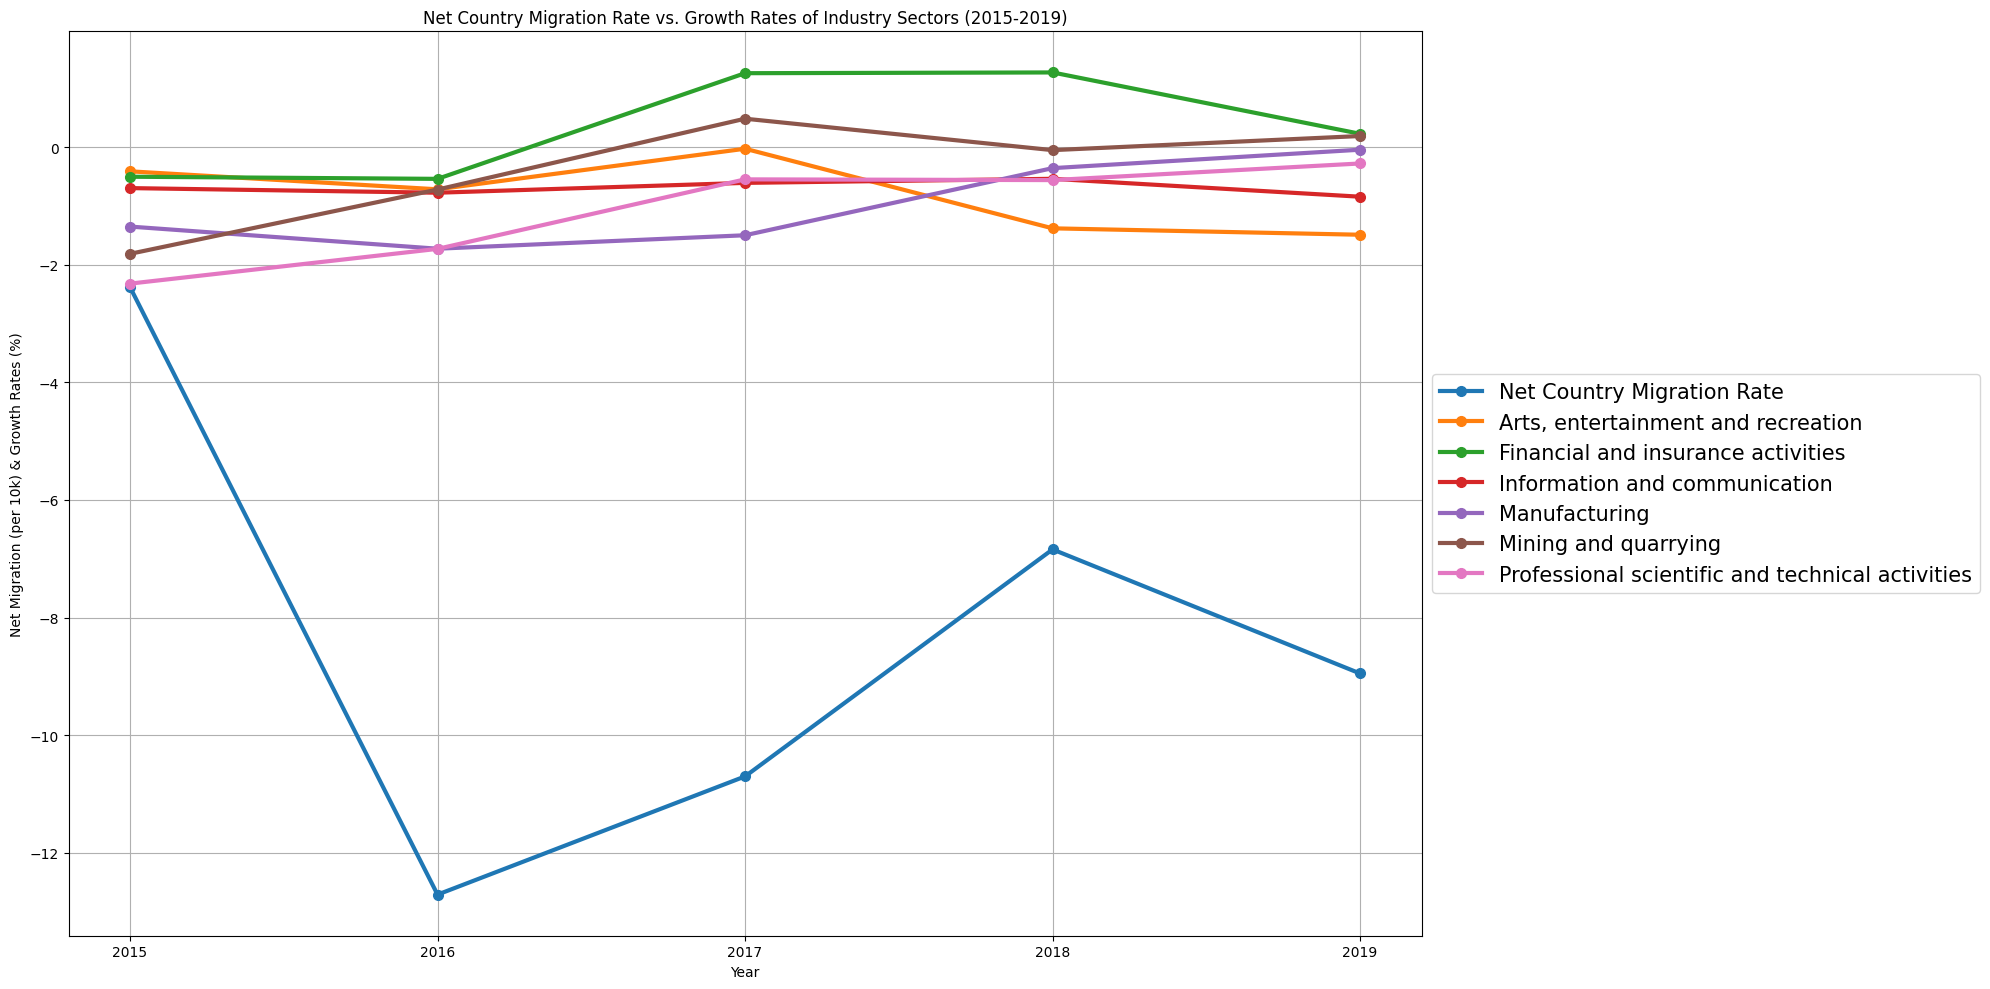

In [27]:
# Plotting net country migration rate and growth rates of industry sectors
plt.figure(figsize=(20, 10))

# Line plot for net country migration rate
plt.plot(net_migration['Year'], net_migration['Net Migration'], marker='o',markersize=7, linewidth=3, label='Net Country Migration Rate')

# Line plots for growth rates of industry sectors
for i in range(len(grouped_sectors_growth)):
    plt.plot(net_migration['Year'], grouped_sectors_growth.iloc[i, 1:], marker='o', markersize=7, linewidth=3,
              label=grouped_sectors_growth['isic_section_name'][i])

plt.xlabel('Year')
plt.ylabel('Net Migration (per 10k) & Growth Rates (%)')
plt.title('Net Country Migration Rate vs. Growth Rates of Industry Sectors (2015-2019)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 15)
plt.grid(True)
#plt.savefig('6.png')
plt.tight_layout()
plt.show()

**Correlation Between Country Migration and Industry Growth**

Initial Growth Rates (2015 - 2016): In 2015, all industry sectors exhibited negative growth rates, indicating an overall contraction or decline in these sectors during that year. In 2016 all the industry sections still had negative growth rates, where they mostly had a slight increase or decrease in their growth rate.

Subsequent Trends (2016-2019):  From 2016 to 2018, most industry sectors experienced a shift from negative to positive growth rates, signifying an overall recovery or improvement in these sectors. Where as from 2018 to 2019 there were slight fluctuations in growth rates. The 'Arts, entertainment and recreation' sector remained on a declining trajectory, exhibiting a continuous decrease in growth rates, indicating a sustained struggle or challenges faced by this industry. The 'Information and communication' sect


**7. What is the trend in the net migration rate of industry sectors in Malaysia from 2015 to 2019?**

In [28]:
# Loading data into a DataFrame
industry_migration = pd.read_excel('dataset/dataset/public_use-talent-migration.xlsx', sheet_name = 'Industry Migration')

# Checking the info and number of unique values
industry_migration.info()
industry_migration.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5295 entries, 0 to 5294
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country_code        5295 non-null   object 
 1   country_name        5295 non-null   object 
 2   wb_income           5295 non-null   object 
 3   wb_region           5295 non-null   object 
 4   isic_section_index  5295 non-null   object 
 5   isic_section_name   5295 non-null   object 
 6   industry_id         5295 non-null   int64  
 7   industry_name       5295 non-null   object 
 8   net_per_10K_2015    5295 non-null   float64
 9   net_per_10K_2016    5295 non-null   float64
 10  net_per_10K_2017    5295 non-null   float64
 11  net_per_10K_2018    5295 non-null   float64
 12  net_per_10K_2019    5295 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage: 537.9+ KB


country_code           137
country_name           137
wb_income                4
wb_region                7
isic_section_index      19
isic_section_name       19
industry_id            143
industry_name          143
net_per_10K_2015      4951
net_per_10K_2016      4957
net_per_10K_2017      4954
net_per_10K_2018      4938
net_per_10K_2019      4950
dtype: int64

In [29]:
industry_migration.head()

,country_code,country_name,wb_income,wb_region,isic_section_index,isic_section_name,industry_id,industry_name,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
0,ae,United Arab Emirates,High income,Middle East & North Africa,C,Manufacturing,1,Defense & Space,378.74,127.94,8.20,68.51,49.55
1,ae,United Arab Emirates,High income,Middle East & North Africa,J,Information and communication,3,Computer Hardware,100.97,358.14,112.98,149.57,182.22
2,ae,United Arab Emirates,High income,Middle East & North Africa,J,Information and communication,4,Computer Software,1079.36,848.15,596.48,409.18,407.41
3,ae,United Arab Emirates,High income,Middle East & North Africa,J,Information and communication,5,Computer Networking,401.46,447.39,163.99,236.69,188.07
4,ae,United Arab Emirates,High income,Middle East & North Africa,J,Information and communication,6,Internet,1840.33,1368.42,877.71,852.39,519.40


In [30]:
# Keeping data that is for Malaysia only
malaysia_industry_migration = industry_migration.copy()
malaysia_industry_migration = industry_migration[industry_migration['country_name'] == 'Malaysia']

In [31]:
# Dropping unnecessary columns
industry_trends = malaysia_industry_migration.drop(columns = ['country_name', 'country_code', 'wb_region', 'wb_income', 'industry_name', 'isic_section_index',
                                                               'industry_id'])

# Renaming columns
industry_trends = industry_trends.rename(columns={'net_per_10K_2015': '2015', 'net_per_10K_2016': '2016', 'net_per_10K_2017': '2017', 'net_per_10K_2018': '2018',
                                                   'net_per_10K_2019': '2019'})

# Resetting index and viewing the info & first 5 rows
industry_trends = industry_trends.reset_index(drop=True)
industry_trends.info()
industry_trends.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   isic_section_name  73 non-null     object 
 1   2015               73 non-null     float64
 2   2016               73 non-null     float64
 3   2017               73 non-null     float64
 4   2018               73 non-null     float64
 5   2019               73 non-null     float64
dtypes: float64(5), object(1)
memory usage: 3.5+ KB


,isic_section_name,2015,2016,2017,2018,2019
0,Information and communication,-114.36,-84.96,-73.74,43.63,-19.21
1,Information and communication,72.77,48.56,-12.93,42.16,-30.12
2,Information and communication,249.47,135.53,3.36,118.91,-57.51
3,Information and communication,7.43,-58.27,-51.54,-43.45,-82.70
4,Information and communication,-13.13,-11.08,-45.36,-28.83,-36.09


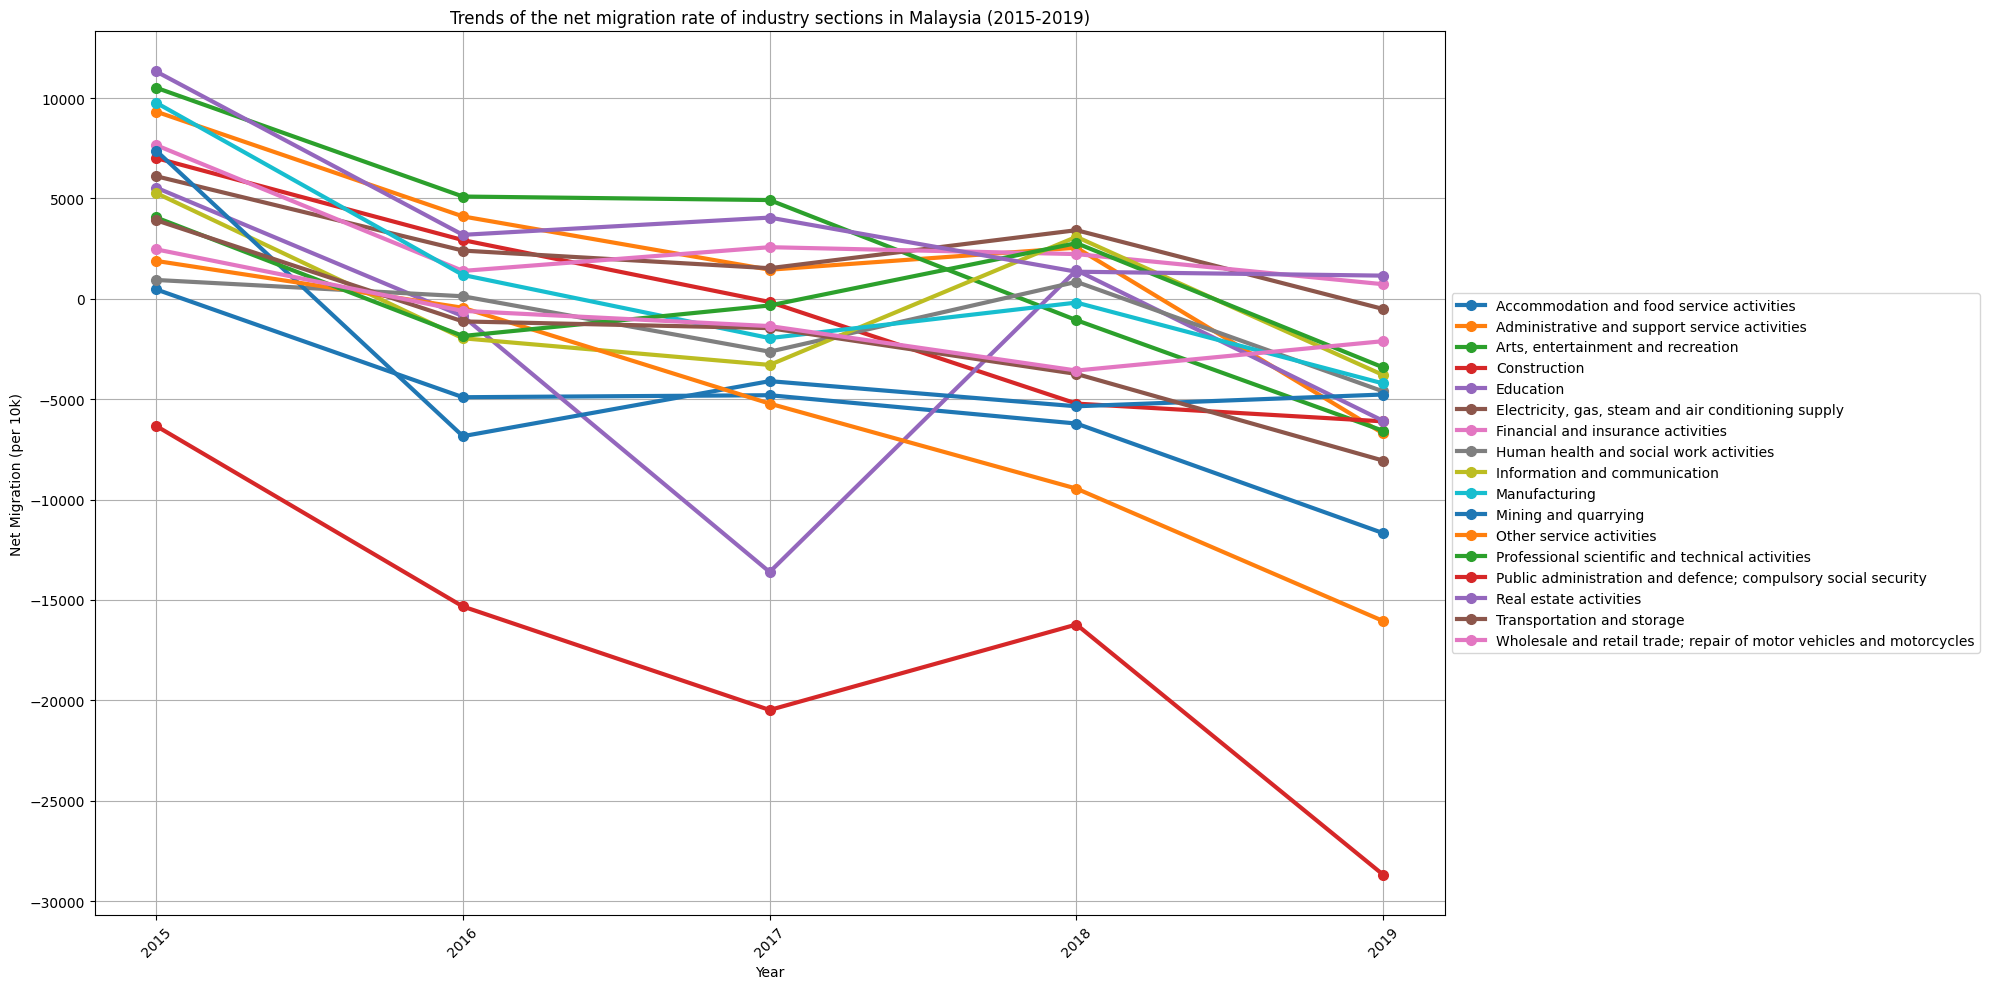

In [32]:
# Grouping by industry section and calculating mean growth rates across years
grouped_industry_trends = industry_trends.groupby('isic_section_name').mean().reset_index()

# Selecting growth rate columns
industry_trends_columns = ['2015', '2016', '2017', '2018', '2019']

# Plotting growth rates for each Industry Section
plt.figure(figsize=(20, 10))

for index, row in grouped_industry_trends.iterrows():
    plt.plot(industry_trends_columns, row[industry_trends_columns]* 100, marker='o', markersize=7, label=row['isic_section_name'], linewidth=3)

plt.xlabel('Year')
plt.ylabel('Net Migration (per 10k)')
plt.title('Trends of the net migration rate of industry sections in Malaysia (2015-2019)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 10)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
#plt.savefig('7.png')
plt.show()

**Trend Analysis of Industry Migration Rates:**

Initial Positive Migration Rates (2015): In 2015, the majority of industry sectors exhibited positive migration rates, signaling a net influx of individuals into these sectors. Only the "public administration and defence; compulsory social security" sector had a negative migration rate, indicating a net outflow of individuals from this particular sector.

Progressive Transition to Negative Migration (2016-2019): Over subsequent years, there was a consistent decline in migration rates across various industry sectors. This transition indicates a gradual decrease in the net inflow of individuals into these sectors, resulting in a net outflow in many sectors by 2019.

Sectoral Challenges or Opportunities: The decreasing migration rates might indicate challenges within specific industries, such as job market competitiveness, skill demand, or overall industry growth.

**8. Which industry sections exhibit the highest migration rates through out 2015 to 2019?**

In [33]:
malaysia_industry_migration.head()

,country_code,country_name,wb_income,wb_region,isic_section_index,isic_section_name,industry_id,industry_name,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
3380,my,Malaysia,Upper middle income,East Asia & Pacific,J,Information and communication,3,Computer Hardware,-114.36,-84.96,-73.74,43.63,-19.21
3381,my,Malaysia,Upper middle income,East Asia & Pacific,J,Information and communication,4,Computer Software,72.77,48.56,-12.93,42.16,-30.12
3382,my,Malaysia,Upper middle income,East Asia & Pacific,J,Information and communication,6,Internet,249.47,135.53,3.36,118.91,-57.51
3383,my,Malaysia,Upper middle income,East Asia & Pacific,J,Information and communication,7,Semiconductors,7.43,-58.27,-51.54,-43.45,-82.70
3384,my,Malaysia,Upper middle income,East Asia & Pacific,J,Information and communication,8,Telecommunications,-13.13,-11.08,-45.36,-28.83,-36.09


In [34]:
# Dropping unnecessary columns
industry_migration_diff = malaysia_industry_migration.drop(columns = ['country_name', 'country_code', 'wb_region', 'wb_income', 'industry_name', 'isic_section_index',
                                                               'industry_id'])

# Renaming columns
industry_migration_diff = industry_migration_diff.rename(columns={'net_per_10K_2015': '2015', 'net_per_10K_2016': '2016', 'net_per_10K_2017': '2017', 'net_per_10K_2018': '2018',
                                                   'net_per_10K_2019': '2019'})

# Resetting index and viewing the info & first 5 rows
industry_migration_diff= industry_migration_diff.reset_index(drop=True)
industry_migration_diff.info()
industry_migration_diff.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   isic_section_name  73 non-null     object 
 1   2015               73 non-null     float64
 2   2016               73 non-null     float64
 3   2017               73 non-null     float64
 4   2018               73 non-null     float64
 5   2019               73 non-null     float64
dtypes: float64(5), object(1)
memory usage: 3.5+ KB


,isic_section_name,2015,2016,2017,2018,2019
0,Information and communication,-114.36,-84.96,-73.74,43.63,-19.21
1,Information and communication,72.77,48.56,-12.93,42.16,-30.12
2,Information and communication,249.47,135.53,3.36,118.91,-57.51
3,Information and communication,7.43,-58.27,-51.54,-43.45,-82.70
4,Information and communication,-13.13,-11.08,-45.36,-28.83,-36.09


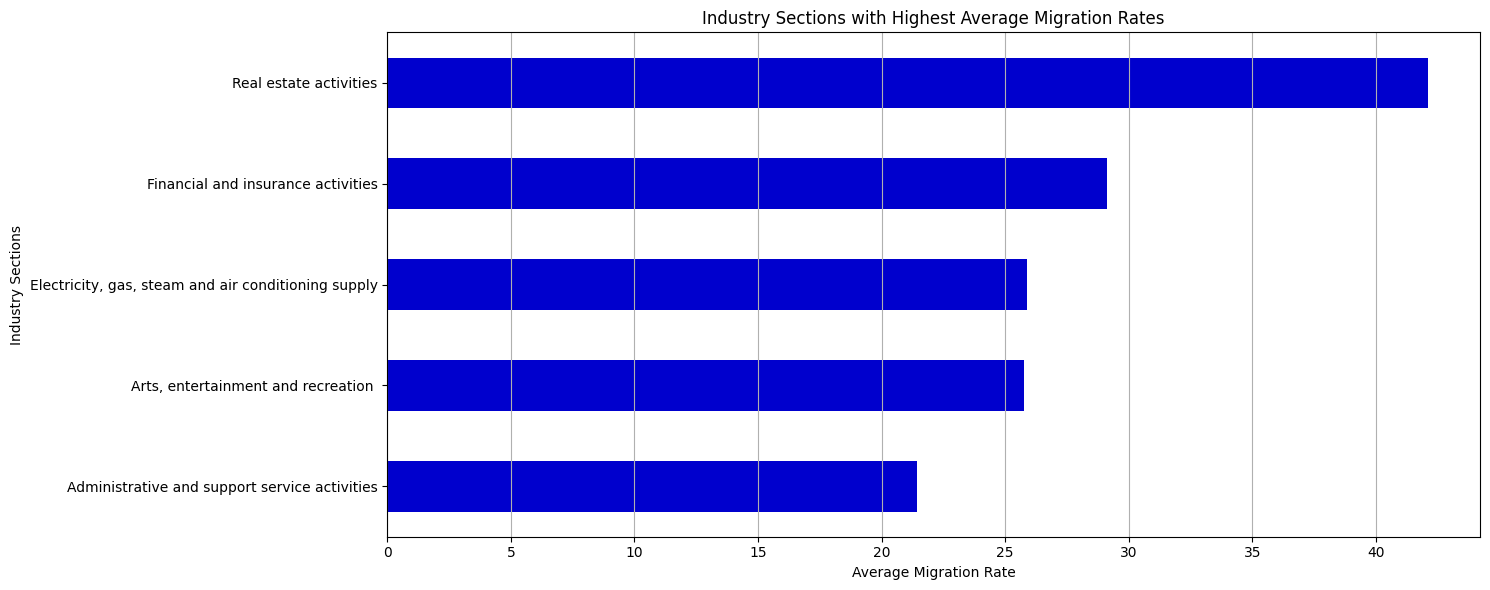

In [35]:
# Calculate the average migration rate for each industry across 2015-2019
average_migration = industry_migration_diff.groupby('isic_section_name').mean()

# Sort industries by their average migration rates
sorted_by_average = average_migration.mean(axis=1).sort_values()

# Select industries with highest and lowest average migration rates
top_industries = sorted_by_average.tail(5) 
bottom_industries = sorted_by_average.head(5)

# Plotting the industries with highest average migration rates
plt.figure(figsize=(15, 6))
top_industries.plot(kind='barh', color='mediumblue')
plt.xlabel('Average Migration Rate')
plt.ylabel('Industry Sections')
plt.title('Industry Sections with Highest Average Migration Rates')
plt.grid(axis='x')
plt.tight_layout()
#plt.savefig('8.png')
plt.show()

**Industries with Highest Average Migration Rates:**

Real Estate & Financial Services: Sectors like 'Real estate activities' and 'Financial and insurance activities' demonstrate high inbound and outbound migration rates. This suggests notable movement of talent in and out of these industries, potentially due to market fluctuations or changing job prospects.

Diverse Service Sectors: Industries such as 'Arts, entertainment and recreation', 'Administrative and support service activities', and 'Electricity, gas, steam and air conditioning supply' exhibit considerable migration rates, indicating fluid workforce movements within these sectors.

**9. Which industry sections exhibit the lowest migration rates through out 2015 to 2019?**

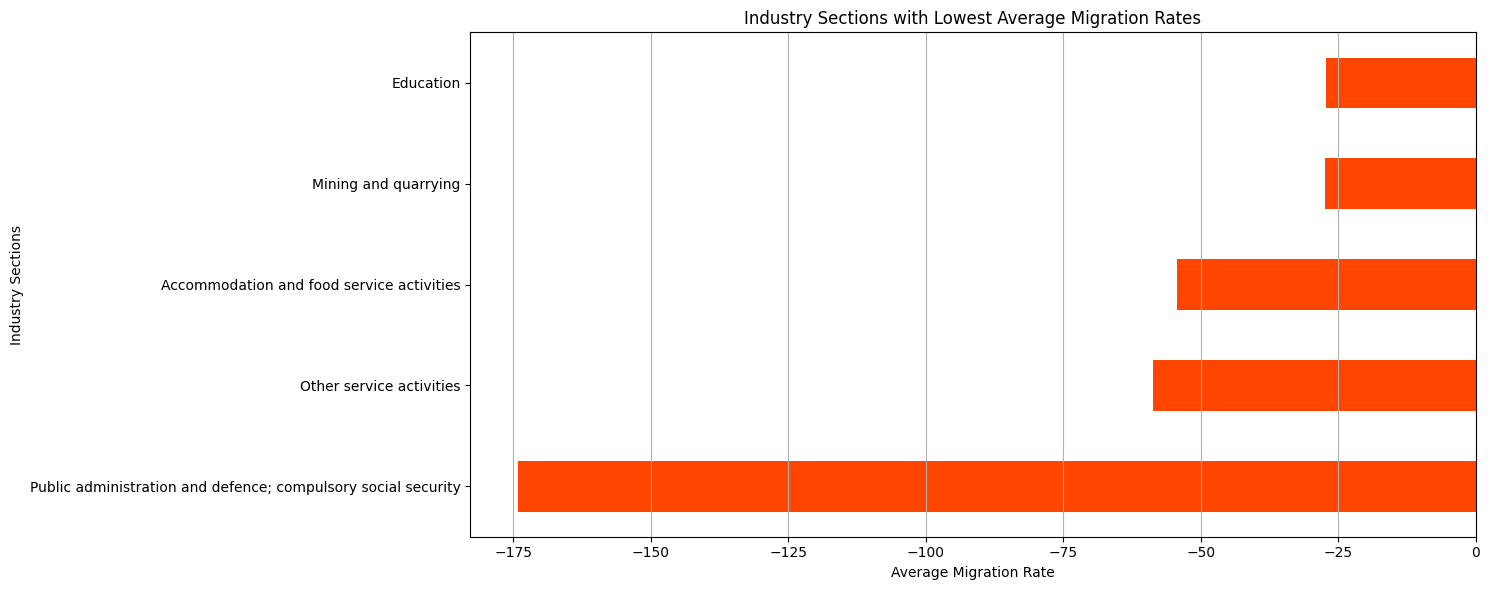

In [36]:
# Plotting the industries with lowest average migration rates
plt.figure(figsize=(15, 6))
bottom_industries.plot(kind='barh', color='orangered')
plt.xlabel('Average Migration Rate')
plt.ylabel('Industry Sections')
plt.title('Industry Sections with Lowest Average Migration Rates')
plt.grid(axis='x')
plt.tight_layout()
#plt.savefig('9.png')
plt.show()

**Industries with Lowest Average Migration Rates:**

Stability in Essential Sectors: Sectors like 'Public administration and defence; compulsory social security' and 'Education' display the lowest migration rates. This implies a relatively stable workforce, possibly due to the nature of public services or consistent employment patterns within these sectors.

Service and Extraction Industries: 'Other service activities', 'Accommodation and food service activities', and 'Mining and quarrying' also show lower migration rates, indicating potential steadiness or fewer workforce transitions in these industries.

**9. How do the migration rates of industries sections compare with their respective growth rates from 2015 to 2019?**

In [37]:
grouped_sectors_growth

,isic_section_name,2015,2016,2017,2018,2019
0,"Arts, entertainment and recreation",-0.411407,-0.716980,-0.027071,-1.380537,-1.489657
1,Financial and insurance activities,-0.503094,-0.539385,1.257333,1.270160,0.226914
2,Information and communication,-0.696513,-0.775126,-0.607610,-0.538498,-0.842829
3,Manufacturing,-1.350914,-1.727099,-1.498327,-0.357162,-0.043652
4,Mining and quarrying,-1.814151,-0.721080,0.483540,-0.050944,0.188989
5,Professional scientific and technical activities,-2.320669,-1.729732,-0.547882,-0.560364,-0.277839


In [38]:
grouped_industry_trends.head()

,isic_section_name,2015,2016,2017,2018,2019
0,Accommodation and food service activities,4.690000,-49.020000,-48.020000,-62.125000,-116.720000
1,Administrative and support service activities,93.233333,41.040000,14.490000,25.460000,-67.086667
2,"Arts, entertainment and recreation",105.130000,50.940000,49.183333,-10.643333,-65.753333
3,Construction,70.090000,29.243333,-1.586667,-52.196667,-61.043333
4,Education,55.370000,-8.650000,-136.067500,14.230000,-60.812500


In [39]:
industries = grouped_sectors_growth['isic_section_name'].unique()
industries 

array(['Arts, entertainment and recreation ',
       'Financial and insurance activities',
       'Information and communication', 'Manufacturing',
       'Mining and quarrying',
       'Professional scientific and technical activities'], dtype=object)

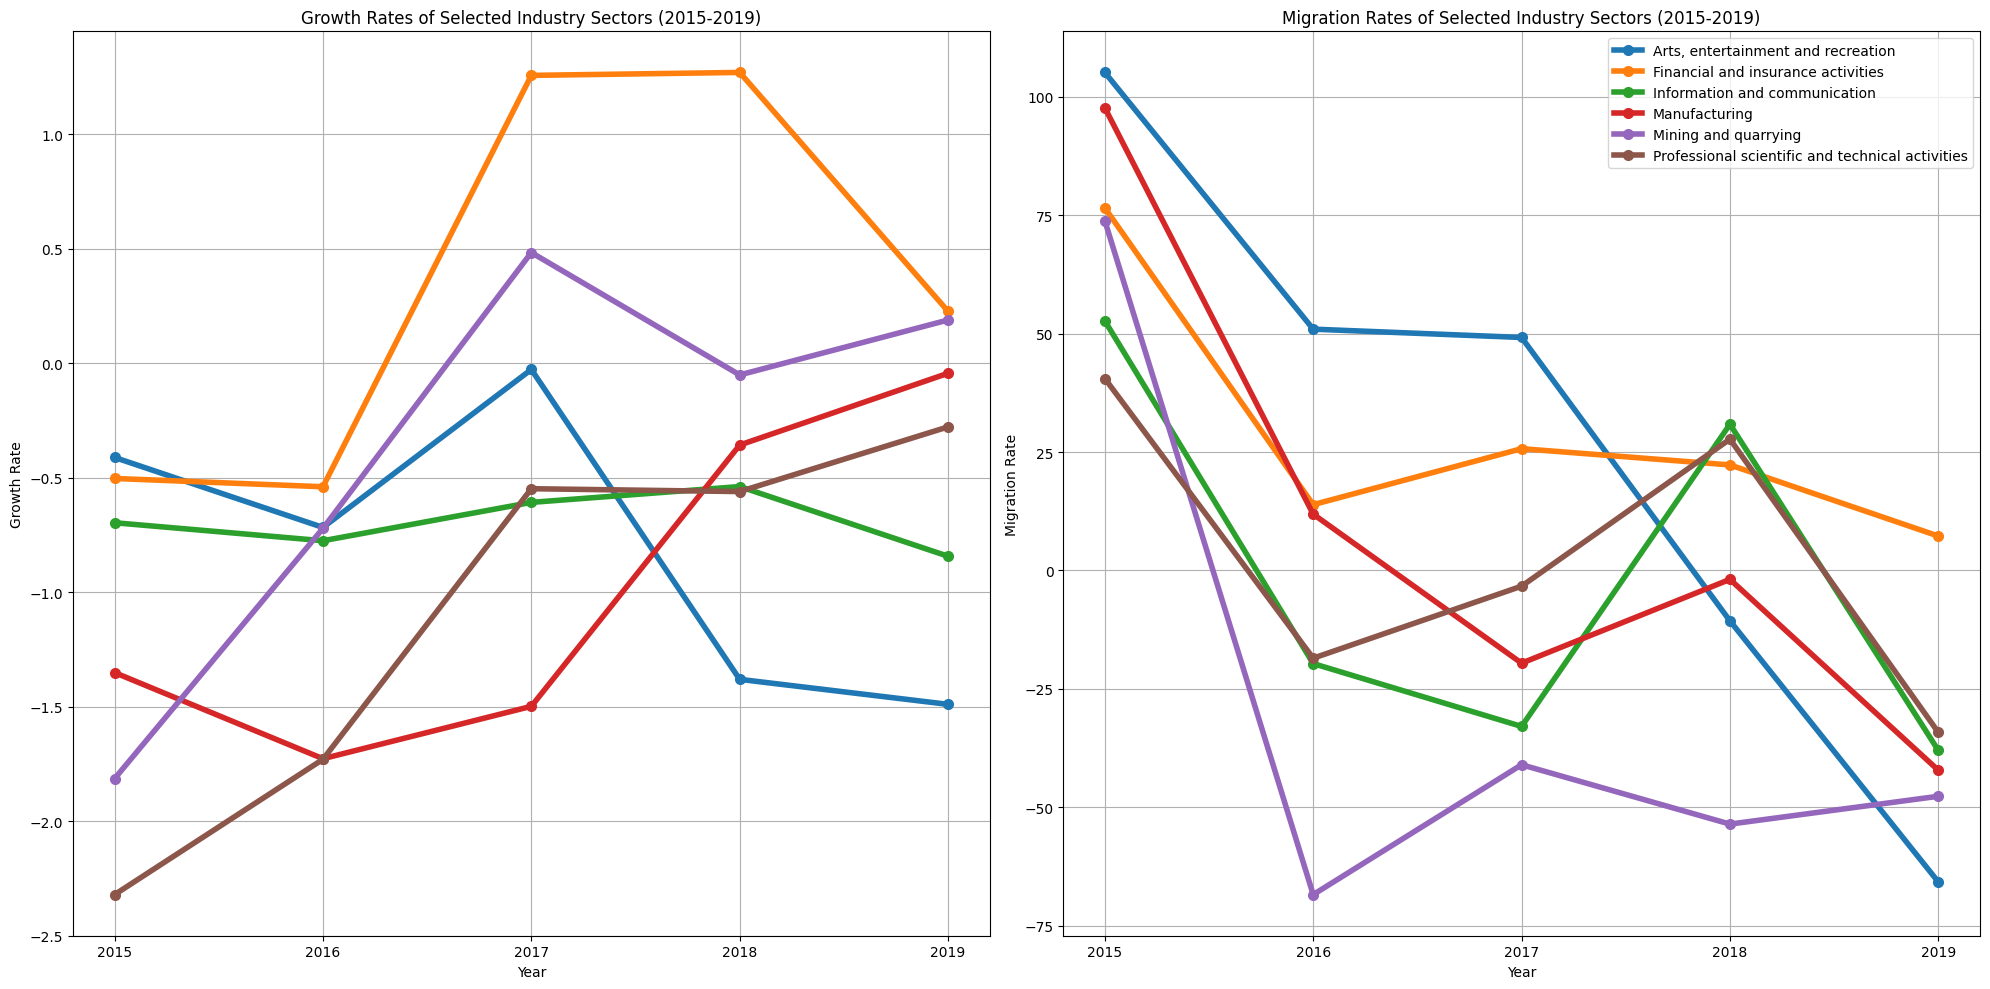

In [40]:
filtered_sectors_growth = grouped_sectors_growth[grouped_sectors_growth['isic_section_name'].isin(industries)]
filtered_industry_trends = grouped_industry_trends[grouped_industry_trends['isic_section_name'].isin(industries)]

# Plotting side-by-side bar plots for growth rates and migration rates
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
for idx, row in filtered_sectors_growth.iterrows():
    plt.plot(filtered_sectors_growth.columns[1:], row[1:], marker='o', markersize=7, linewidth=4, label=row['isic_section_name'])

plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.title('Growth Rates of Selected Industry Sectors (2015-2019)')
plt.grid(True)

plt.subplot(1, 2, 2)
for idx, row in filtered_industry_trends.iterrows():
    plt.plot(filtered_industry_trends.columns[1:], row[1:], marker='o', markersize=7, linewidth=4, label=row['isic_section_name'])

plt.xlabel('Year')
plt.ylabel('Migration Rate')
plt.title('Migration Rates of Selected Industry Sectors (2015-2019)')
plt.legend()
plt.grid(True)

plt.tight_layout()
#plt.savefig('9.png')
plt.show()

Creating individual graphs for each industry for better visualization

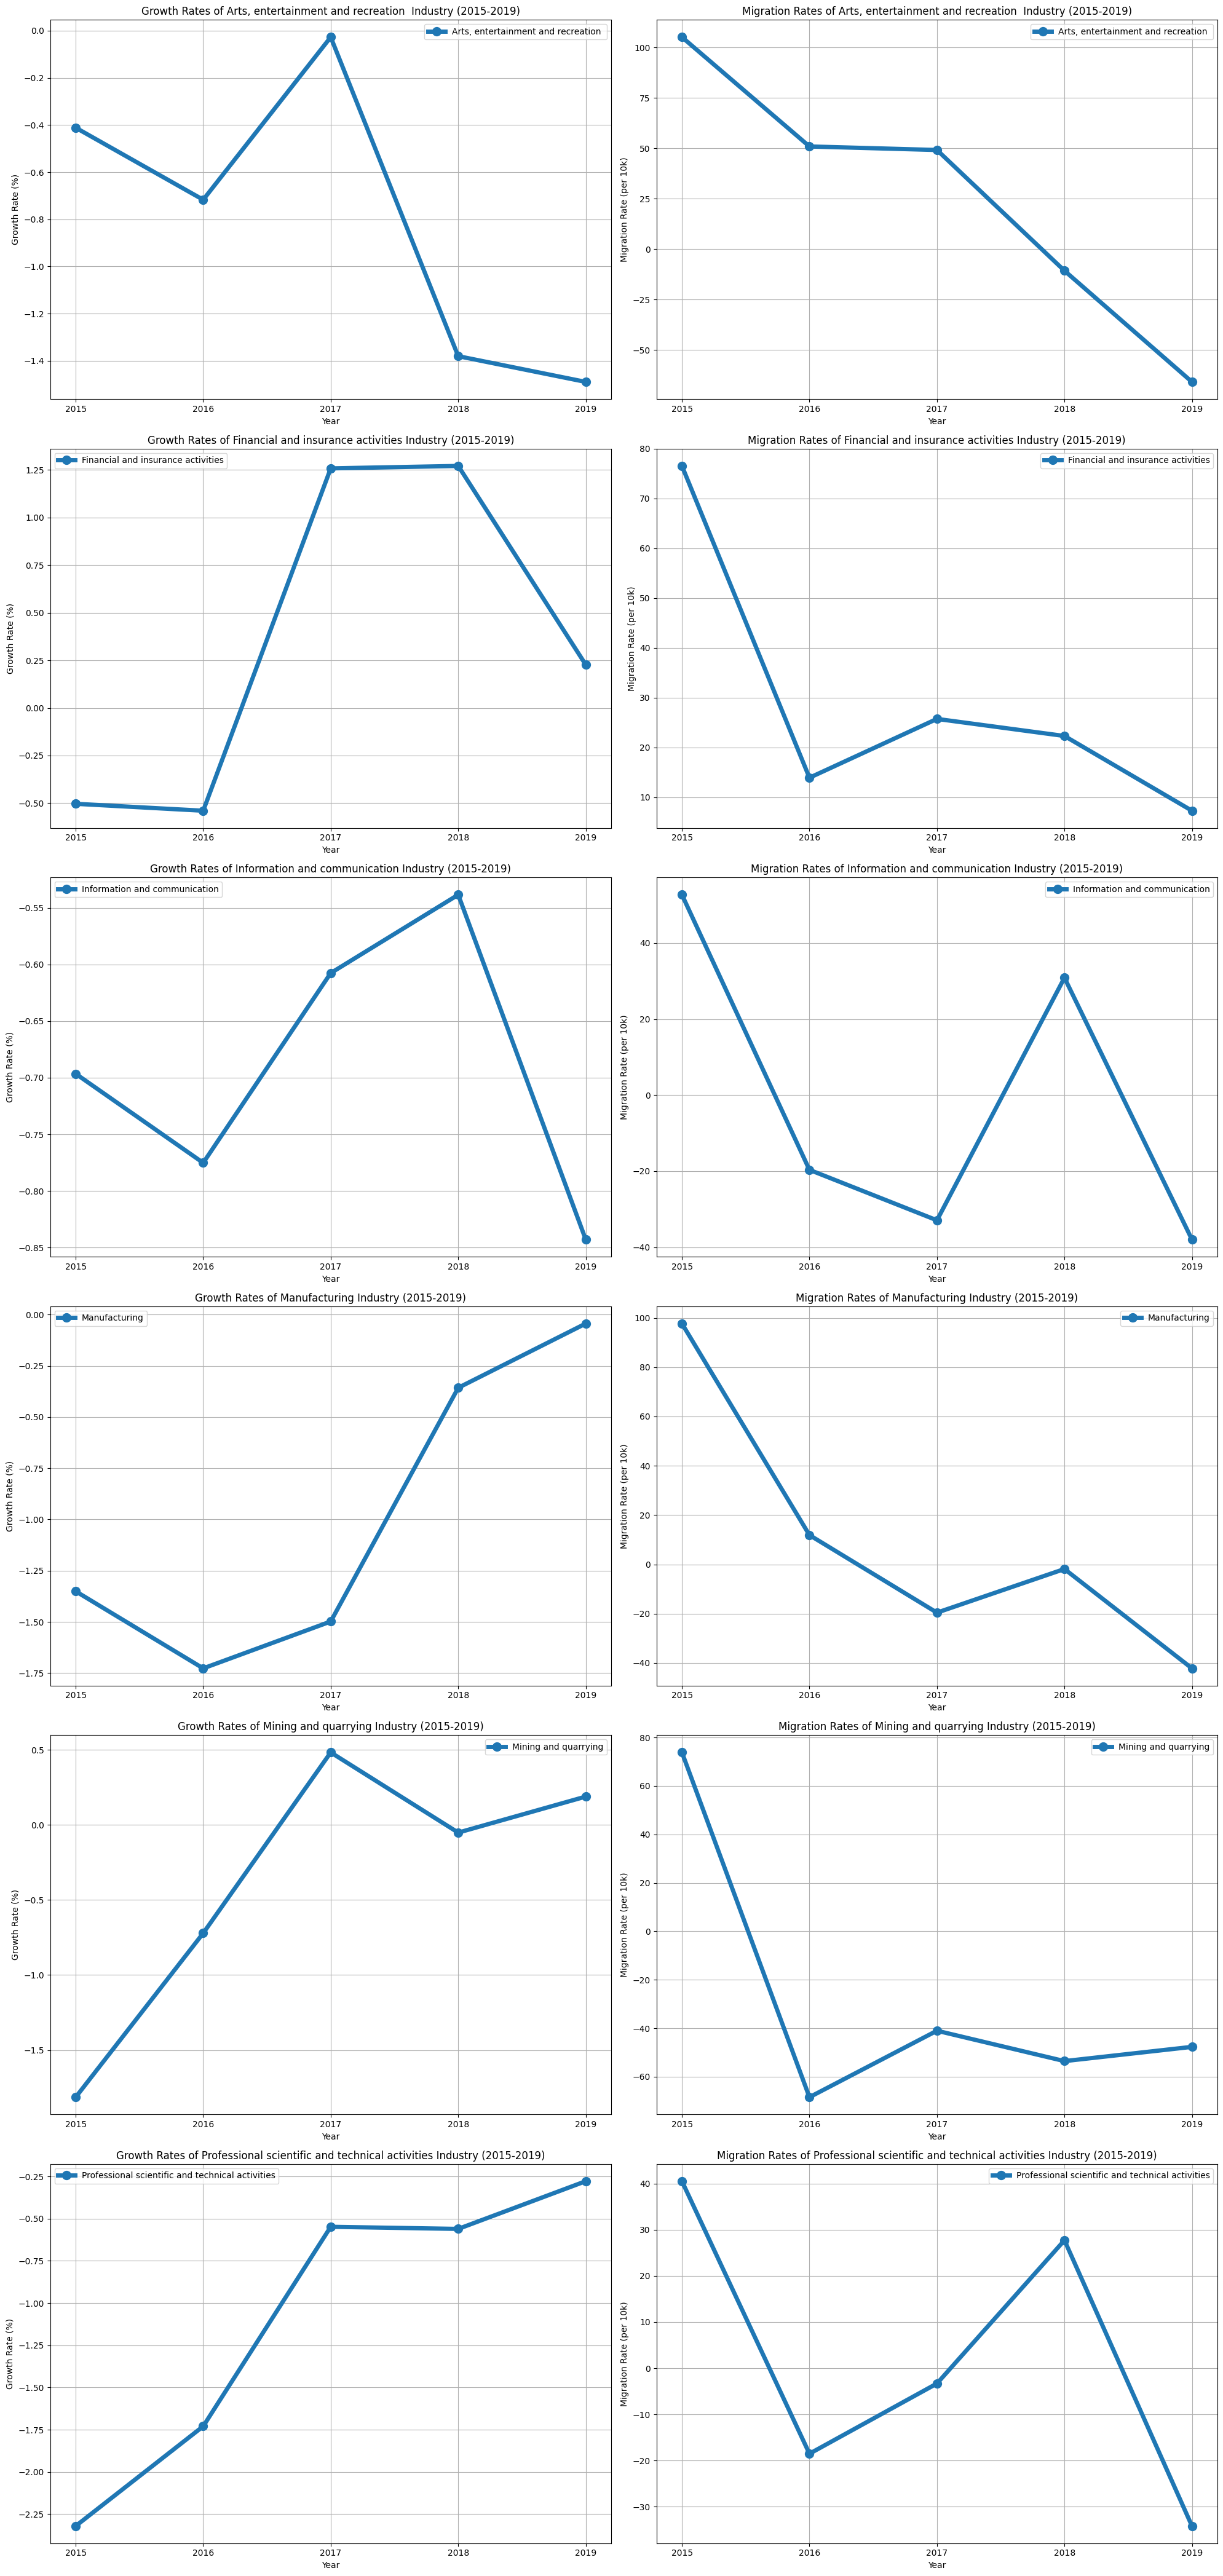

In [41]:
# Get the number of industries for plotting
num_industries = len(filtered_sectors_growth)

# Create figure and axes
fig, axs = plt.subplots(num_industries, 2, figsize=(20, 7 * num_industries))

# Iterate through each industry
for idx, (index, row_growth) in enumerate(filtered_sectors_growth.iterrows()):
    row_trend = filtered_industry_trends.iloc[idx]
    
    # Plot growth rates
    axs[idx, 0].plot(filtered_sectors_growth.columns[1:], row_growth[1:], marker='o', markersize=10, linewidth=5, label=row_growth['isic_section_name'])
    axs[idx, 0].set_xlabel('Year')
    axs[idx, 0].set_ylabel('Growth Rate (%)')
    axs[idx, 0].set_title(f'Growth Rates of {row_growth["isic_section_name"]} Industry (2015-2019)')
    axs[idx, 0].legend()
    axs[idx, 0].grid(True)
    
    # Plot migration rates
    axs[idx, 1].plot(filtered_industry_trends.columns[1:], row_trend[1:], marker='o', markersize=10, linewidth=5, label=row_trend['isic_section_name'])
    axs[idx, 1].set_xlabel('Year')
    axs[idx, 1].set_ylabel('Migration Rate (per 10k)')
    axs[idx, 1].set_title(f'Migration Rates of {row_trend["isic_section_name"]} Industry (2015-2019)')
    axs[idx, 1].legend()
    axs[idx, 1].grid(True)

plt.tight_layout()
#plt.savefig('11.png')
plt.show()

**Comparison of Migration Rates and Growth Rates for industry sections**

Partial Correlation Trends: Some industries initially show synchrony in movement between migration and growth rates. However, these correlations tend to weaken or fluctuate over time, indicating intermittent associations rather than consistent relationships.

Industry-Specific Dynamics: Industries like "Manufacturing" showcase diverse trends, suggesting factors other than migration might significantly impact growth rates. This variance highlights unique industry dynamics beyond migration influences.

Complex Interplay: While some industries might showcase occasional correlations between migration and growth rates, the erratic nature of these relationships suggests multiple factors influencing industry sectoral growth dynamics.